### Punto 3.    
#### DBSCAN (Density-Based Spatial Clustering of Applications with Noise) Agrupamiento espacial basado en densidad de aplicaciones con ruido.

#### Cargamos el dataset a usar, en este caso es de los datos de todos los paises del mundo
#### Link de dataset usado: https://www.cepii.fr/CEPII/en/bdd_modele/bdd_modele_item.asp?id=11

In [1]:
# Importar Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('EconMap_3.1_reference_2100.csv')

In [3]:
print(df.head(100))

   code_wb     name  year       gdp   gdp_cap   gdp_crt  capital  labor_force  \
0      ALB  Albania  1980   5610.82       NaN   3288.22    28.41          NaN   
1      ALB  Albania  1981   5933.20       NaN   3457.98    28.61          NaN   
2      ALB  Albania  1982   6108.15       NaN   3636.85    29.00          NaN   
3      ALB  Albania  1983   6175.64       NaN   3599.49    29.53          NaN   
4      ALB  Albania  1984   6098.34       NaN   3492.52    30.09          NaN   
..     ...      ...   ...       ...       ...       ...      ...          ...   
95     ALB  Albania  2075  24769.15  31551.64  25428.37   116.36       673.79   
96     ALB  Albania  2076  24700.80  31969.62  25495.02   116.53       658.81   
97     ALB  Albania  2077  24636.07  32413.51  25580.06   116.71       644.26   
98     ALB  Albania  2078  24572.99  32881.40  25668.93   116.86       630.12   
99     ALB  Albania  2079  24511.67  33374.16  25761.85   116.99       616.37   

    energy_cons  investment

In [5]:
# Análisis Descriptivo
print(df.describe())  # Estadísticas básicas


               year           gdp        gdp_cap       gdp_crt        capital  \
count  21175.000000  2.112700e+04   20212.000000  1.972000e+04   20877.000000   
mean    2040.000000  1.322155e+06   36605.391811  3.828602e+06    4496.196198   
std       34.929323  8.041016e+06   42155.115682  4.645849e+07   34998.070309   
min     1980.000000  1.130000e+02     148.200000  2.770000e+01       0.430000   
25%     2010.000000  1.844432e+04    7891.542500  1.552944e+04      50.610000   
50%     2040.000000  9.357489e+04   21165.740000  9.368014e+04     263.960000   
75%     2070.000000  5.530591e+05   49710.075000  5.983185e+05    1513.000000   
max     2100.000000  1.703116e+08  318494.940000  1.560000e+09  954220.750000   

         labor_force   energy_cons  investment_rate  savings_rate  \
count   20228.000000  1.910500e+04     21124.000000  21124.000000   
mean    22474.032390  1.841477e+06        23.124831     19.262846   
std     70352.182756  1.296979e+07         6.719130     17.5882

In [6]:
# Limpieza de Datos
# Eliminar filas con valores nulos en columnas críticas (por ejemplo, 'gdp')
df_clean = df.dropna(subset=['gdp', 'population'])
print("\nTamaño del DataFrame después de limpiar:", df_clean.shape)



Tamaño del DataFrame después de limpiar: (20212, 16)


#### Análisis de Correlación
#### Selecciona columnas numéricas y calcula su matriz de correlación, visualizándola mediante un mapa de calor para identificar relaciones entre variables.

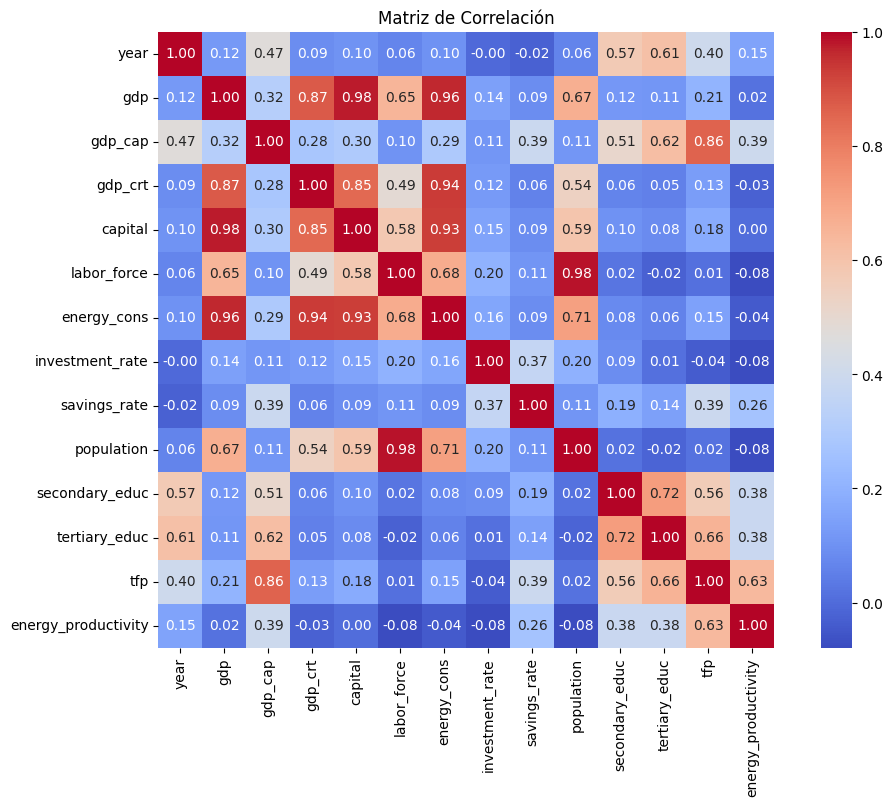

In [7]:
# Selecciona solo las columnas numéricas
numerical_df = df_clean.select_dtypes(include=['float64', 'int64'])

# Calcula la matriz de correlación
correlation_matrix = numerical_df.corr()

# Visualiza la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlación')
plt.show()


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21175 entries, 0 to 21174
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_wb              21175 non-null  object 
 1   name                 21175 non-null  object 
 2   year                 21175 non-null  int64  
 3   gdp                  21127 non-null  float64
 4   gdp_cap              20212 non-null  float64
 5   gdp_crt              19720 non-null  float64
 6   capital              20877 non-null  float64
 7   labor_force          20228 non-null  float64
 8   energy_cons          19105 non-null  float64
 9   investment_rate      21124 non-null  float64
 10  savings_rate         21124 non-null  float64
 11  population           20228 non-null  float64
 12  secondary_educ       21175 non-null  float64
 13  tertiary_educ        21175 non-null  float64
 14  tfp                  19084 non-null  float64
 15  energy_productivity  19104 non-null 

#### Viendo la Matriz de Correlacion observamos que los indicadores de "labor_force" Y "tfp" tienen un indice de relacion muy alto. Por lo cual seran nuestra X para aplicar el modelo de DBSCAN.

In [9]:
X = df[['population','labor_force']].dropna()

#### Al analizar la relación entre labor_force y population, se puede identificar patrones o clusters que indiquen cómo la fuerza laboral varía en diferentes contextos poblacionales. Esto puede ayudar a entender si hay regiones donde la relación entre la fuerza laboral y la población es inusual o esperada. Por ejemplo, puedes detectar si hay áreas con alta población pero baja fuerza laboral, lo que podría indicar problemas económicos, de empleo o de educación.

In [10]:
print(X.shape)

(20228, 2)


#### Normalizamos los datos.

In [11]:
# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Aplicamos el DBSCAN

In [12]:
# Aplicar DBSCAN
from sklearn.cluster import DBSCAN


dbscan = DBSCAN(eps=0.5, min_samples=5) 
clusters = dbscan.fit_predict(X_scaled)

#### Mostramos los clusters unicos identificados

In [13]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2])

#### Graficamos los Clusteres y tambien los datos ruido (outliers) que son los que no fueron asignados a ningun cluster

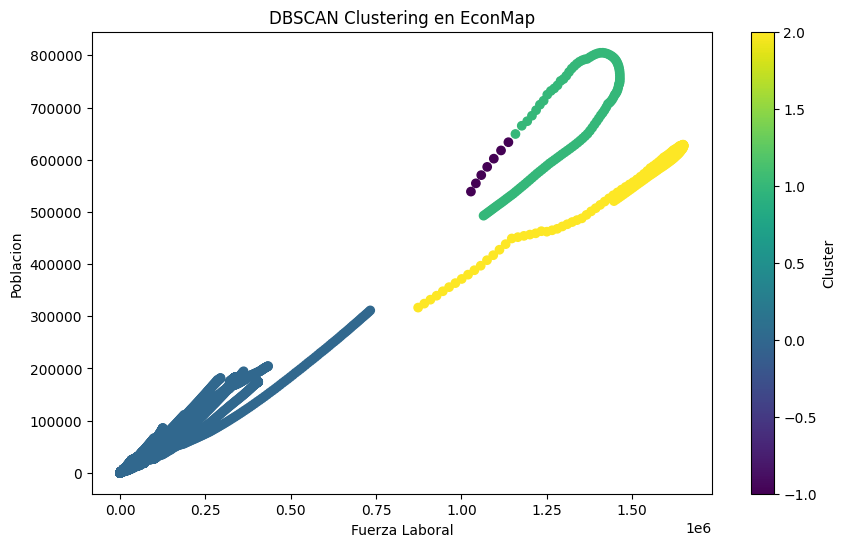

In [15]:
# Graficar los resultados
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X['population'], X['labor_force'], c=clusters, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering en EconMap')
plt.xlabel('Fuerza Laboral')
plt.ylabel('Poblacion')
plt.colorbar(scatter, label='Cluster')
plt.show()

#### Entrenamiento de KNN con Puntos Núcleo
#### Entrena un modelo KNN usando los puntos núcleo generados por DBSCAN para clasificar nuevos datos en los clústeres encontrados.

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

#### Predicción de Clústeres para Nuevos Datos

In [17]:
X_new = np.array([[50, 80], [100, 20], [75, 50]])
knn.predict(X_new)

array([1, 2, 1])

#### Probabilidad de Pertenencia a Clústeres
#### Calcula la probabilidad de que cada nuevo punto en X_new pertenezca a cada clúster usando el modelo KNN.

In [18]:
knn.predict_proba(X_new)

array([[0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.5, 0.5]])

#### Escalamos los nuevos datos

In [19]:
# Escalar los nuevos datos
X_new_scaled = scaler.transform(X_new)

c:\Users\joaco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#### Graficamos los datos anteriores y tambien los nuevos viendo a que cluster pertenece

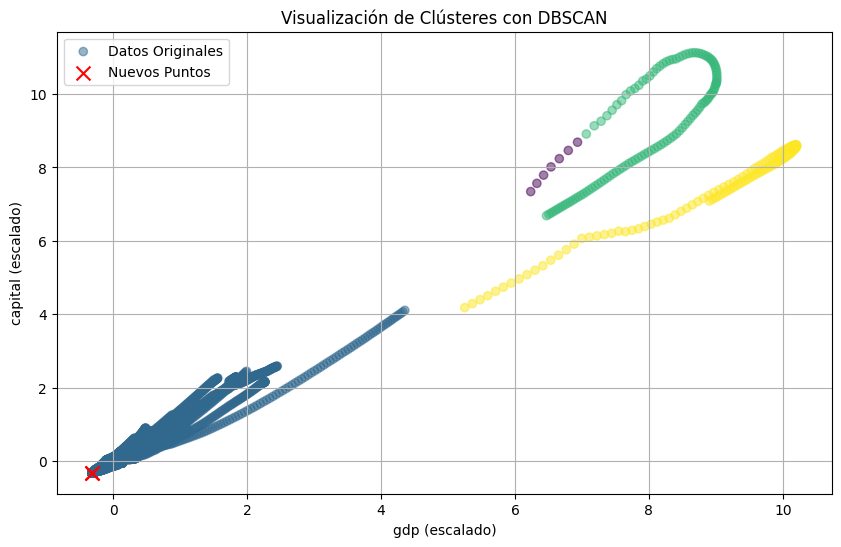

In [20]:
# Graficar los datos originales y los nuevos puntos
plt.figure(figsize=(10, 6))

# Graficar los clústeres originales
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', label='Datos Originales', alpha=0.5)

# Graficar los nuevos puntos
plt.scatter(X_new_scaled[:, 0], X_new_scaled[:, 1], c='red', marker='x', s=100, label='Nuevos Puntos')

# Añadir etiquetas y leyenda
plt.title('Visualización de Clústeres con DBSCAN')
plt.xlabel('gdp (escalado)')
plt.ylabel('capital (escalado)')
plt.legend()
plt.grid(True)
plt.show()

#### Aqui aplciamos DBSCAN a otro dataset.
#### Link del dataset: https://archive.ics.uci.edu/dataset/292/wholesale+customers

In [21]:
datos = pd.read_csv('Wholesale customers data.csv')

In [22]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [24]:
datos.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


#### Selección de Variables Específicas

In [25]:
X2 = datos[['Region','Milk']]

#### Normalización de Datos de X2

In [26]:
# Normalizar los datos
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

#### Aplicamos DBSCAN

In [27]:
# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5) 
clusters = dbscan.fit_predict(X2_scaled)

#### Mostramos los clusters unicos identificados

In [28]:
np.unique(dbscan.labels_)


array([-1,  0,  1,  2])

#### Graficamos los clusters obtenidos con los datos que pertenecen a cada cluster y ademas los datos de ruido

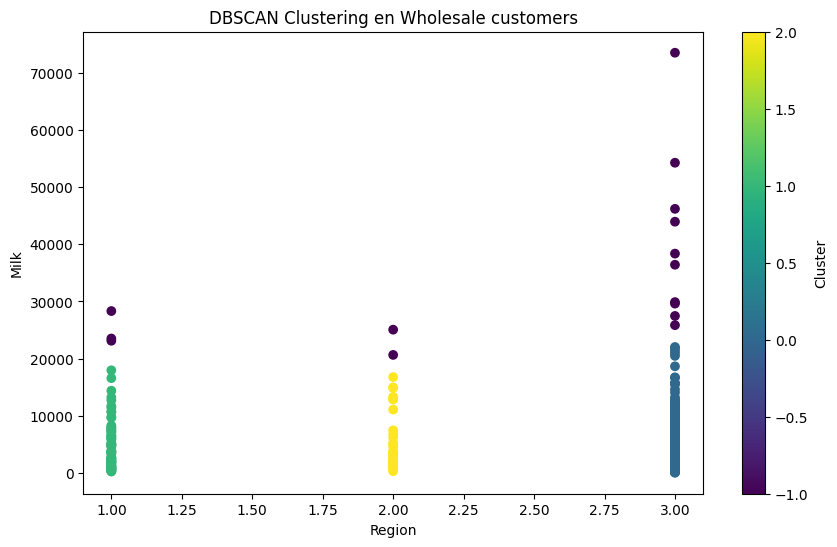

In [55]:
# Graficar los resultados
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X2['Region'], X2['Milk'], c=clusters, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering en Wholesale customers')
plt.xlabel('Region')
plt.ylabel('Milk')
plt.colorbar(scatter, label='Cluster')
plt.show()

#### Entrenamiento de KNN con Datos Normalizados
#### Ajusta un clasificador KNN utilizando los puntos núcleo de DBSCAN como datos de entrenamiento para predecir la pertenencia a clústeres de nuevos datos.

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

#### Predicción de Clústeres para Nuevos Datos Normalizados
#### Usa el modelo KNN entrenado para predecir los clústeres de nuevos puntos (X_new2) basados en los datos normalizados y ajustados.

In [31]:
X_new2 = np.array([[1, 8000], [2, 2250], [2, 5004]])
knn.predict(X_new2)

array([0, 0, 0])

#### Probabilidades de Pertenencia a Clústeres para Nuevos Datos
#### Calcula las probabilidades de que cada nuevo punto en X_new2 pertenezca a cada clúster utilizando el modelo KNN entrenado.

In [32]:
knn.predict_proba(X_new2)

array([[0.74, 0.14, 0.12],
       [0.74, 0.14, 0.12],
       [0.74, 0.14, 0.12]])

#### Escalamos los nuevos datos.

In [33]:
# Escalar los nuevos datos
X_new_scaled2 = scaler.transform(X_new2)

c:\Users\joaco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#### Graficamos los nuevos datos viendo a que cluster fueron asignados.

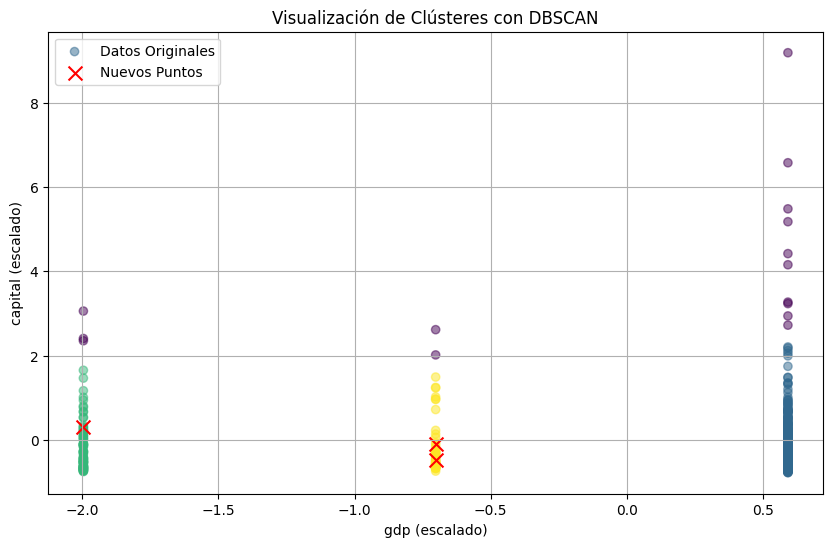

In [34]:
# Graficar los datos originales y los nuevos puntos
plt.figure(figsize=(10, 6))

# Graficar los clústeres originales
plt.scatter(X2_scaled[:, 0], X2_scaled[:, 1], c=clusters, cmap='viridis', label='Datos Originales', alpha=0.5)

# Graficar los nuevos puntos
plt.scatter(X_new_scaled2[:, 0], X_new_scaled2[:, 1], c='red', marker='x', s=100, label='Nuevos Puntos')

# Añadir etiquetas y leyenda
plt.title('Visualización de Clústeres con DBSCAN')
plt.xlabel('gdp (escalado)')
plt.ylabel('capital (escalado)')
plt.legend()
plt.grid(True)
plt.show()

### Gaussian Mixture.

##### Link dataset: https://archive.ics.uci.edu/dataset/162/forest+fires

In [35]:
data = pd.read_csv('forestfires.csv')
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [36]:
data.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

#### Selecciona las columnas temp y RH del DataFrame data, convirtiéndolas en un arreglo NumPy X, y muestra su contenido y dimensiones.

In [37]:
X = data[['temp', 'RH']].values
print(X)
print(X.shape)

[[ 8.2 51. ]
 [18.  33. ]
 [14.6 33. ]
 ...
 [21.2 70. ]
 [25.6 42. ]
 [11.8 31. ]]
(517, 2)


#### Visualiza la relación entre temperatura y humedad relativa mediante un gráfico de dispersión, facilitando la identificación de patrones en los datos.

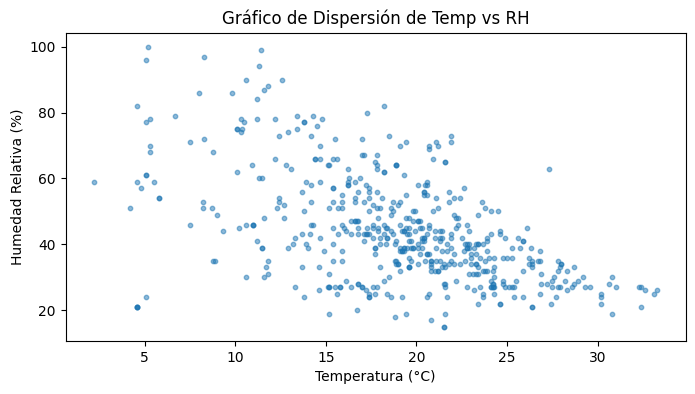

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.5)
plt.xlabel("Temperatura (°C)")
plt.ylabel("Humedad Relativa (%)")
plt.title("Gráfico de Dispersión de Temp vs RH")
plt.show()


#### Entrena un modelo de mezcla gaussiana con 3 componentes en los datos X, utilizando múltiples inicializaciones para mejorar la convergencia.

In [39]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

#### Grafica el modelo de mezcla gaussiana ajustado, mostrando las regiones de probabilidad y la clasificación de los datos de temperatura y humedad relativa.

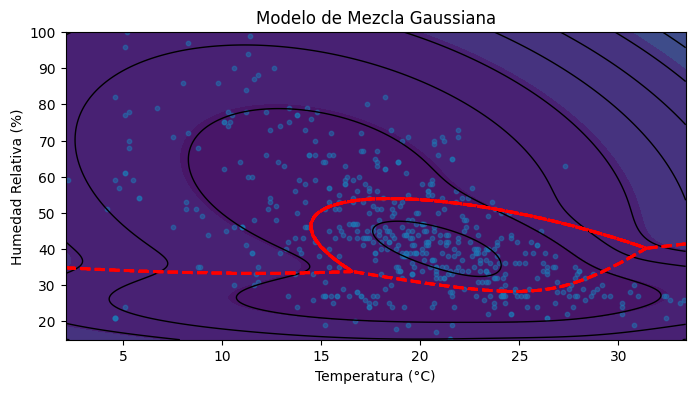

In [40]:
def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')

    plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.5)
    plt.xlabel("Temperatura (°C)")
    if show_ylabels:
        plt.ylabel("Humedad Relativa (%)", rotation=90)
    plt.title("Modelo de Mezcla Gaussiana")

plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, X)
plt.show()


#### Muestra los pesos, centros y covarianzas de los componentes del modelo ajustado, proporcionando información sobre la estructura y características de los clústeres en los datos de temperatura y humedad.

In [41]:
# Parámetros del modelo
print("Pesos de los componentes:\n", gm.weights_)
print("Centros de los componentes:\n", gm.means_)
print("Covarianzas de los componentes:\n", gm.covariances_)


Pesos de los componentes:
 [0.44070692 0.19900698 0.3602861 ]
Centros de los componentes:
 [[21.07522299 40.18661701]
 [21.50862983 26.72792752]
 [14.76827497 59.00487669]]
Covarianzas de los componentes:
 [[[ 11.86416558 -14.71321259]
  [-14.71321259  55.32492059]]

 [[ 46.22475164   1.93576895]
  [  1.93576895  18.91824316]]

 [[ 26.74028717 -24.47754999]
  [-24.47754999 251.98434665]]]


#### Realiza predicciones para cada punto en X usando el modelo de mezcla gaussiana y calcula las probabilidades de pertenencia a cada componente.

In [42]:
# Predicciones para cada punto
predicciones = gm.predict(X)
print("Predicciones:\n", predicciones)

# Probabilidades de pertenencia a cada componente
probabilidades = gm.predict_proba(X)
print("Probabilidades:\n", probabilidades)


Predicciones:
 [2 0 1 2 2 1 1 2 2 0 0 0 2 0 1 0 1 0 2 2 0 0 0 0 0 2 0 0 1 0 1 2 0 0 0 2 1
 2 1 2 0 0 2 0 2 1 2 0 2 2 1 0 0 0 0 1 2 2 2 2 2 2 0 0 0 0 0 0 0 1 1 0 1 0
 1 2 0 2 2 1 0 0 0 0 0 1 1 0 0 1 2 1 0 0 1 2 2 1 2 0 0 2 0 0 2 2 1 0 0 2 2
 1 0 0 1 1 1 1 1 0 2 0 0 0 0 1 2 0 0 2 0 2 2 0 2 0 2 2 0 0 0 0 0 0 0 1 2 1
 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 2 2 2 0 0 1 0 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0
 0 2 0 2 2 1 1 1 1 1 0 2 1 2 0 0 2 2 0 2 0 0 0 0 1 1 2 0 2 1 1 2 2 1 1 2 0
 2 2 2 0 0 0 1 0 1 1 0 0 1 0 0 0 1 2 0 1 2 2 2 0 0 2 1 0 1 0 0 0 0 0 0 0 2
 0 0 2 0 0 2 2 2 1 0 0 2 2 0 2 2 2 1 1 1 1 2 1 2 2 2 0 2 0 0 0 0 0 0 1 2 0
 2 0 0 2 1 0 0 0 2 0 0 0 0 1 1 1 2 1 0 1 1 1 1 1 0 1 1 2 2 1 1 0 0 1 1 1 0
 2 0 2 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2 2 0 0 0 0 0 2 0 0 0 0 2 2 0 0 0 1 0 2
 2 2 2 0 2 2 2 0 2 2 0 2 1 2 0 0 2 2 0 0 2 0 0 1 2 2 2 0 0 0 0 0 0 0 0 1 2
 2 0 0 2 2 1 0 0 1 0 1 0 0 0 1 1 0 0 2 2 0 0 0 0 0 0 2 0 0 0 2 2 0 2 0 2 2
 2 2 2 2 2 2 0 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 1 1 1 0 2 0 0 0 1 0 2 2 1
 1 0 1 1 1

#### Evalúa la calidad del agrupamiento utilizando la puntuación de silueta, que mide la separación entre los clústeres formados por el modelo de mezcla gaussiana.

In [43]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, predicciones)
print(f"Puntuación de Silueta: {silhouette_avg}")


Puntuación de Silueta: 0.3517254841751335


#### Crea y ajusta un modelo de mezcla gaussiana bayesiana con 5 componentes, visualizando las regiones de probabilidad y clasificaciones en los datos de temperatura y humedad.

c:\Users\joaco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\mixture\_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


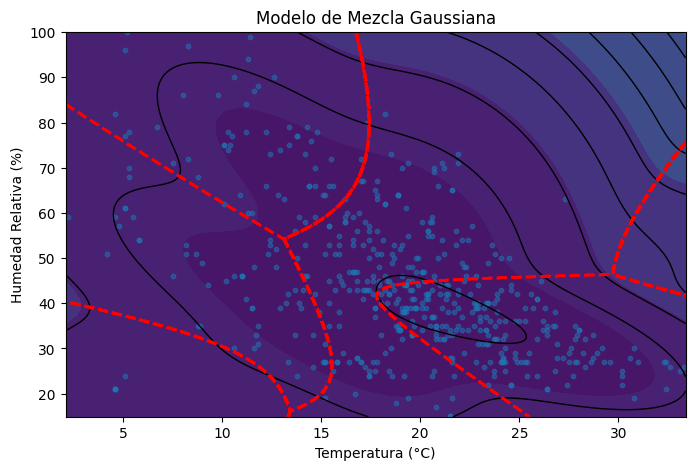

In [44]:
from sklearn.mixture import BayesianGaussianMixture

# Crear y ajustar el modelo de mezcla gaussiana bayesiana
bgm = BayesianGaussianMixture(n_components=5, n_init=10, random_state=42)
bgm.fit(X)

# Visualizar el modelo bayesiano
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()


#### Identifica y visualiza anomalías en los datos mediante el modelo de mezcla gaussiana, resaltando los puntos de menor densidad en el gráfico como estrellas rojas.

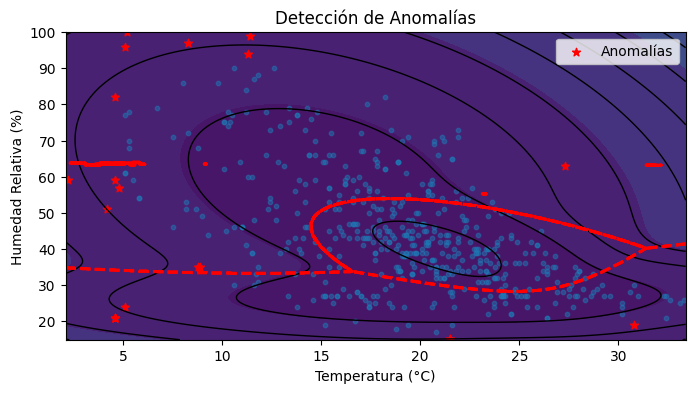

In [46]:
# Detección de anomalías
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)  # Umbral para los 4% de menor densidad
anomalies = X[densities < density_threshold]

plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*', label='Anomalías')
plt.title("Detección de Anomalías")
plt.legend()
plt.show()


#### Evaluamos la puntuación de silueta para diferentes números de componentes en un modelo de mezcla gaussiana, ayudando a determinar el número óptimo de clústeres según la calidad del agrupamiento.

In [47]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

for n in range(1, 10):
    gm = GaussianMixture(n_components=n, n_init=10, random_state=42)
    gm.fit(X)
    predicciones = gm.predict(X)

    # Asegúrate de que haya al menos 2 clusters
    if len(set(predicciones)) > 1:
        silhouette_avg = silhouette_score(X, predicciones)
        print(f"Número de Componentes: {n}, Puntuación de Silueta: {silhouette_avg}")
    else:
        print(f"Número de Componentes: {n}, solo un cluster encontrado. No se puede calcular la puntuación de silueta.")


Número de Componentes: 1, solo un cluster encontrado. No se puede calcular la puntuación de silueta.
Número de Componentes: 2, Puntuación de Silueta: 0.556762016340987
Número de Componentes: 3, Puntuación de Silueta: 0.3517254841751335
Número de Componentes: 4, Puntuación de Silueta: 0.3527739842285374
Número de Componentes: 5, Puntuación de Silueta: 0.3273813290922827
Número de Componentes: 6, Puntuación de Silueta: 0.3439009006886135
Número de Componentes: 7, Puntuación de Silueta: 0.28304810170496875
Número de Componentes: 8, Puntuación de Silueta: 0.3354797111723083
Número de Componentes: 9, Puntuación de Silueta: 0.3265068041107871


#### Observando estos resultados vemos que lo mas recomendable es usar n_components = 2. Lo cual aplicamos ahora.

In [48]:
gm2 = GaussianMixture(n_components=2, n_init=10, random_state=42)
gm2.fit(X)

GaussianMixture(n_components=2, n_init=10, random_state=42)

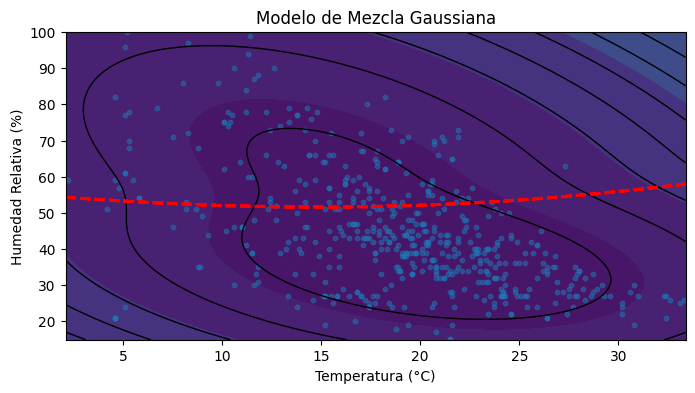

In [49]:
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm2, X)
plt.show()

In [50]:
# Parámetros del modelo
print("Pesos de los componentes:\n", gm2.weights_)
print("Centros de los componentes:\n", gm2.means_)
print("Covarianzas de los componentes:\n", gm2.covariances_)


Pesos de los componentes:
 [0.69126879 0.30873121]
Centros de los componentes:
 [[20.46920107 36.27013334]
 [15.35137454 62.24116409]]
Covarianzas de los componentes:
 [[[ 28.40749165 -15.0705752 ]
  [-15.0705752   83.90736598]]

 [[ 27.28794415 -35.91859768]
  [-35.91859768 206.63338857]]]


In [51]:
# Predicciones para cada punto
predicciones = gm2.predict(X)
print("Predicciones:\n", predicciones)

# Probabilidades de pertenencia a cada componente
probabilidades = gm2.predict_proba(X)
print("Probabilidades:\n", probabilidades)


Predicciones:
 [0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1
 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1
 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0
 0 0 0 0 0

In [ ]:
silhouette_avg = silhouette_score(X, predicciones)
print(f"Puntuación de Silueta: {silhouette_avg}")

Puntuación de Silueta: 0.556762016340987


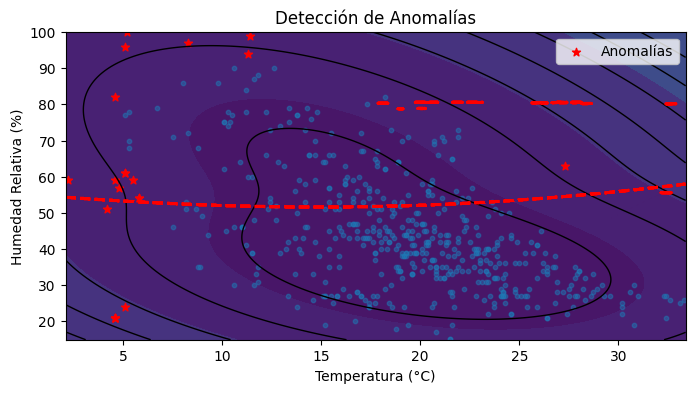

In [54]:
# Detección de anomalías
densities = gm2.score_samples(X)
density_threshold = np.percentile(densities, 4)  # Umbral para los 4% de menor densidad
anomalies = X[densities < density_threshold]

plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm2, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*', label='Anomalías')
plt.title("Detección de Anomalías")
plt.legend()
plt.show()
